In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

# 전처리

In [2]:
df = pd.read_csv('./data/시군구_성_연령_5세_별_인구2_2020.csv', encoding='euc-kr')
df.head(260).tail()

,광역시도,시군구,행정구,구분,인구수,0 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,...,65 - 69세,70 - 74세,75 - 79세,80세 이상,80 - 84세,85세 이상,85 - 89세,90 - 94세,95 - 99세,100세 이상
255,경기도,수원시,소계,계,1181470,43910,56741,57093,63808,86365,...,43315,31267,23774,27796,16028,11768,8044,2957,671,96
256,경기도,수원시,소계,남자,594380,22626,29290,29411,33178,44785,...,20789,14491,10013,9142,5900,3242,2414,678,137,14
257,경기도,수원시,소계,여자,587090,21284,27451,27682,30630,41581,...,22527,16776,13761,18654,10129,8526,5630,2280,535,82
258,경기도,수원시,장안구,계,273908,7659,11548,13483,16100,22511,...,11311,8549,6870,8443,4806,3637,2459,944,207,28
259,경기도,수원시,장안구,남자,137852,3904,6034,6954,8498,12166,...,5418,3905,2892,2846,1819,1027,755,225,46,2


In [3]:
df['시군구'][df.행정구.notnull()] = df.행정구[df.행정구.notnull()]
df.head(260).tail()

,광역시도,시군구,행정구,구분,인구수,0 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,...,65 - 69세,70 - 74세,75 - 79세,80세 이상,80 - 84세,85세 이상,85 - 89세,90 - 94세,95 - 99세,100세 이상
255,경기도,소계,소계,계,1181470,43910,56741,57093,63808,86365,...,43315,31267,23774,27796,16028,11768,8044,2957,671,96
256,경기도,소계,소계,남자,594380,22626,29290,29411,33178,44785,...,20789,14491,10013,9142,5900,3242,2414,678,137,14
257,경기도,소계,소계,여자,587090,21284,27451,27682,30630,41581,...,22527,16776,13761,18654,10129,8526,5630,2280,535,82
258,경기도,장안구,장안구,계,273908,7659,11548,13483,16100,22511,...,11311,8549,6870,8443,4806,3637,2459,944,207,28
259,경기도,장안구,장안구,남자,137852,3904,6034,6954,8498,12166,...,5418,3905,2892,2846,1819,1027,755,225,46,2


In [4]:
# 소계 데이터 제외
df = df[df.시군구 != '소계']
df.head()

,광역시도,시군구,행정구,구분,인구수,0 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,...,65 - 69세,70 - 74세,75 - 79세,80세 이상,80 - 84세,85세 이상,85 - 89세,90 - 94세,95 - 99세,100세 이상
6,서울특별시,종로구,NaN,계,144866,3309,4549,5120,6182,10602,...,7637,6245,5450,6265,3682,2583,1749,639,169,26
7,서울특별시,종로구,NaN,남자,70613,1668,2297,2575,3099,4976,...,3744,2842,2369,2406,1517,889,642,189,52,6
8,서울특별시,종로구,NaN,여자,74253,1641,2252,2545,3083,5627,...,3893,3403,3081,3859,2165,1694,1107,451,117,20
9,서울특별시,중구,NaN,계,121520,3483,3611,3093,3869,7605,...,6872,5475,4501,5030,2904,2126,1429,558,124,16
10,서울특별시,중구,NaN,남자,59536,1772,1852,1550,1976,3543,...,3380,2523,1943,1754,1125,629,439,153,32,6


In [5]:
df['20~39세'] = df['20 - 24세'] + df['25 - 29세'] + df['30 - 34세'] + df['35 - 39세']
df['65세이상'] = df['65 - 69세'] + df['70 - 74세'] + df['75 - 79세'] + df['80세 이상']
df = df[['광역시도','시군구','구분','인구수','20~39세','65세이상']]
df.head()

,광역시도,시군구,구분,인구수,20~39세,65세이상
6,서울특별시,종로구,계,144866,43061,25597
7,서울특별시,종로구,남자,70613,21327,11361
8,서울특별시,종로구,여자,74253,21736,14236
9,서울특별시,중구,계,121520,38455,21878
10,서울특별시,중구,남자,59536,18864,9600


In [6]:
pop = pd.pivot_table(df,
                     index=['광역시도','시군구'], columns=['구분'],
                     values=['인구수','20~39세','65세이상'])
pop.head()

20~39세                65세이상                   인구수                
구분             계     남자     여자      계     남자     여자       계      남자      여자
광역시도 시군구                                                                   
강원도   강릉시  47006  25199  21807  43830  18604  25227  211643  105025  106618
      고성군   5217   3175   2042   7755   3237   4519   26792   13864   12928
      동해시  18727  10469   8258  17572   7624   9949   89814   45572   44242
      삼척시  13583   7469   6117  16077   6766   9311   65623   33275   32348
      속초시  18080   9909   8171  15170   6345   8826   81497   40312   41185

In [7]:
# 인구 소멸비율 계산
pop['소멸비율'] = pop['20~39세','여자'] / pop['65세이상','계']
pop.head()

20~39세                65세이상                   인구수                  \
구분             계     남자     여자      계     남자     여자       계      남자      여자   
광역시도 시군구                                                                      
강원도   강릉시  47006  25199  21807  43830  18604  25227  211643  105025  106618   
      고성군   5217   3175   2042   7755   3237   4519   26792   13864   12928   
      동해시  18727  10469   8258  17572   7624   9949   89814   45572   44242   
      삼척시  13583   7469   6117  16077   6766   9311   65623   33275   32348   
      속초시  18080   9909   8171  15170   6345   8826   81497   40312   41185   

               소멸비율  
구분                   
광역시도 시군구             
강원도   강릉시  0.497536  
      고성군  0.263314  
      동해시  0.469952  
      삼척시  0.380481  
      속초시  0.538629

In [8]:
pop['소멸위기지역'] = pop.소멸비율 < 0.5
pop['소멸위기고위험지역'] = pop.소멸비율 < 0.2
pop.head()

20~39세                65세이상                   인구수                  \
구분             계     남자     여자      계     남자     여자       계      남자      여자   
광역시도 시군구                                                                      
강원도   강릉시  47006  25199  21807  43830  18604  25227  211643  105025  106618   
      고성군   5217   3175   2042   7755   3237   4519   26792   13864   12928   
      동해시  18727  10469   8258  17572   7624   9949   89814   45572   44242   
      삼척시  13583   7469   6117  16077   6766   9311   65623   33275   32348   
      속초시  18080   9909   8171  15170   6345   8826   81497   40312   41185   

               소멸비율 소멸위기지역 소멸위기고위험지역  
구분                                    
광역시도 시군구                              
강원도   강릉시  0.497536   True     False  
      고성군  0.263314   True     False  
      동해시  0.469952   True     False  
      삼척시  0.380481   True     False  
      속초시  0.538629  False     False

In [9]:
# 인구소멸 위기지역
crisis_region = pop[pop.소멸위기지역].index.get_level_values(1)
print(crisis_region)

Index([' 강릉시', ' 고성군', ' 동해시', ' 삼척시', ' 양구군', ' 양양군', ' 영월군', ' 인제군', ' 정선군',
       ' 철원군',
       ...
       ' 청양군', ' 태안군', ' 홍성군', ' 괴산군', ' 단양군', ' 보은군', ' 영동군', ' 옥천군', ' 음성군',
       ' 제천시'],
      dtype='object', name='시군구', length=102)


In [10]:
# 인구소멸위기 고위험지역
high_crisis_region = pop[pop.소멸위기고위험지역].index.get_level_values(1)
print(high_crisis_region)

Index([' 남해군', ' 산청군', ' 의령군', ' 하동군', ' 합천군', ' 군위군', ' 봉화군', ' 영덕군', ' 영양군',
       ' 의성군', ' 청도군', ' 청송군', ' 고흥군', ' 곡성군', ' 보성군', ' 신안군', ' 함평군', ' 임실군',
       ' 부여군', ' 서천군', ' 청양군', ' 보은군'],
      dtype='object', name='시군구')


In [11]:
pop.columns.get_level_values(0)

Index(['20~39세', '20~39세', '20~39세', '65세이상', '65세이상', '65세이상', '인구수', '인구수',
       '인구수', '소멸비율', '소멸위기지역', '소멸위기고위험지역'],
      dtype='object')

In [12]:
for i in range(len(pop.columns.get_level_values(0))):
    print(pop.columns.get_level_values(0)[i]+pop.columns.get_level_values(1)[i])

20~39세계
20~39세남자
20~39세여자
65세이상계
65세이상남자
65세이상여자
인구수계
인구수남자
인구수여자
소멸비율
소멸위기지역
소멸위기고위험지역


In [13]:
tmp_col = [pop.columns.get_level_values(0)[i] + pop.columns.get_level_values(1)[i]
           for i in range(len(pop.columns.get_level_values(0)))]
pop.columns = tmp_col
pop.reset_index(inplace=True)
pop['시군구'] = pop.시군구.apply(lambda x: x.strip())
pop.head()

,광역시도,시군구,20~39세계,20~39세남자,20~39세여자,65세이상계,65세이상남자,65세이상여자,인구수계,인구수남자,인구수여자,소멸비율,소멸위기지역,소멸위기고위험지역
0,강원도,강릉시,47006,25199,21807,43830,18604,25227,211643,105025,106618,0.497536,True,False
1,강원도,고성군,5217,3175,2042,7755,3237,4519,26792,13864,12928,0.263314,True,False
2,강원도,동해시,18727,10469,8258,17572,7624,9949,89814,45572,44242,0.469952,True,False
3,강원도,삼척시,13583,7469,6117,16077,6766,9311,65623,33275,32348,0.380481,True,False
4,강원도,속초시,18080,9909,8171,15170,6345,8826,81497,40312,41185,0.538629,False,False


In [14]:
pop.to_csv('./data/1.시군구_전처리완료.csv', encoding='euc-kr', index=False)

# ID 부여

In [15]:
pop.시군구.unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '과천시', '광명시', '광주시', '구리시', '군포시', '권선구', '기흥구', '김포시',
       '남양주시', '단원구', '덕양구', '동두천시', '동안구', '만안구', '부천시', '분당구', '상록구',
       '수정구', '수지구', '시흥시', '안성시', '양주시', '양평군', '여주시', '연천군', '영통구',
       '오산시', '의왕시', '의정부시', '이천시', '일산동구', '일산서구', '장안구', '중원구', '처인구',
       '파주시', '팔달구', '평택시', '포천시', '하남시', '화성시', '거제시', '거창군', '김해시',
       '남해군', '마산합포구', '마산회원구', '밀양시', '사천시', '산청군', '성산구', '양산시', '의령군',
       '의창구', '진주시', '진해구', '창녕군', '통영시', '하동군', '함안군', '함양군', '합천군',
       '경산시', '경주시', '고령군', '구미시', '군위군', '김천시', '남구', '문경시', '봉화군', '북구',
       '상주시', '성주군', '안동시', '영덕군', '영양군', '영주시', '영천시', '예천군', '울릉군',
       '울진군', '의성군', '청도군', '청송군', '칠곡군', '광산구', '동구', '서구', '달서구', '달성군',
       '수성구', '중구', '대덕구', '유성구', '강서구', '금정구', '기장군', '동래구', '부산진구',
       '사상구', '사하구', '수영구', '연제구', '영도구', '해운대구', '강남구', '강동구', '강북구',


In [16]:
# 고성군 - 고성(강원), 고성(경남)
# 광역시 - 서울 용산, 서울 서대문, 대전 서구, 대전 유성, 세종
# 행정구 - 수원 장안, 용인 수지, 고양 일산동, 창원 합포, 창원 회원
tmp_gu_dict = {
    '수원': ['장안구', '권선구', '팔달구', '영통구'], 
    '성남': ['수정구', '중원구', '분당구'], 
    '안양': ['만안구', '동안구'], 
    '안산': ['상록구', '단원구'], 
    '고양': ['덕양구', '일산동구', '일산서구'], 
    '용인': ['처인구', '기흥구', '수지구'], 
    '청주': ['상당구', '서원구', '흥덕구', '청원구'], 
    '천안': ['동남구', '서북구'], 
    '전주': ['완산구', '덕진구'], 
    '포항': ['남구', '북구'], 
    '창원': ['의창구', '성산구', '진해구', '마산합포구', '마산회원구']
}

In [17]:
metro_list = ['서울특별시','부산광역시','대구광역시','인천광역시','대전광역시','광주광역시','울산광역시']
si_name = [None] * len(pop)

for i in pop.index:
    if pop.광역시도[i] in metro_list:
        if len(pop.시군구[i]) == 2:
            si_name[i] = pop.광역시도[i][:2] + ' ' + pop.시군구[i]
        else:
            si_name[i] = pop.광역시도[i][:2] + ' ' + pop.시군구[i][:-1]     # 긴 구 이름에서 '구' 제외
    else:
        if pop.시군구[i][:-1] == '고성':
            if pop.광역시도[i] == '강원도':
                si_name[i] = '고성(강원)'
            else:
                si_name[i] = '고성(경남)'
        else:
            si_name[i] = pop.시군구[i][:-1]

        for key, values in tmp_gu_dict.items():
            if pop.시군구[i] in values:
                if len(pop.시군구[i]) == 2:
                    si_name[i] = key + ' ' + pop.시군구[i]
                elif pop.시군구[i] in ['마산합포구', '마산회원구']:
                    si_name[i] = key + ' ' + pop.시군구[i][2:-1]
                else:
                    si_name[i] = key + ' ' + pop.시군구[i][:-1]

In [18]:
print(si_name)

['강릉', '고성(강원)', '동해', '삼척', '속초', '양구', '양양', '영월', '원주', '인제', '정선', '철원', '춘천', '태백', '평창', '홍천', '화천', '횡성', '가평', '과천', '광명', '광주', '구리', '군포', '수원 권선', '용인 기흥', '김포', '남양주', '안산 단원', '고양 덕양', '동두천', '안양 동안', '안양 만안', '부천', '성남 분당', '안산 상록', '성남 수정', '용인 수지', '시흥', '안성', '양주', '양평', '여주', '연천', '수원 영통', '오산', '의왕', '의정부', '이천', '고양 일산동', '고양 일산서', '수원 장안', '성남 중원', '용인 처인', '파주', '수원 팔달', '평택', '포천', '하남', '화성', '거제', '거창', '고성(경남)', '김해', '남해', '창원 합포', '창원 회원', '밀양', '사천', '산청', '창원 성산', '양산', '의령', '창원 의창', '진주', '창원 진해', '창녕', '통영', '하동', '함안', '함양', '합천', '경산', '경주', '고령', '구미', '군위', '김천', '포항 남구', '문경', '봉화', '포항 북구', '상주', '성주', '안동', '영덕', '영양', '영주', '영천', '예천', '울릉', '울진', '의성', '청도', '청송', '칠곡', '광주 광산', '광주 남구', '광주 동구', '광주 북구', '광주 서구', '대구 남구', '대구 달서', '대구 달성', '대구 동구', '대구 북구', '대구 서구', '대구 수성', '대구 중구', '대전 대덕', '대전 동구', '대전 서구', '대전 유성', '대전 중구', '부산 강서', '부산 금정', '부산 기장', '부산 남구', '부산 동구', '부산 동래', '부산 부산진', '부산 북구', '부산 사상', '부산 사하', '부산 서구', '부산 수영', '부산 연제'

In [19]:
pop['ID'] = si_name
del pop['20~39세남자']
del pop['65세이상남자']
del pop['65세이상여자']
pop.head()

,광역시도,시군구,20~39세계,20~39세여자,65세이상계,인구수계,인구수남자,인구수여자,소멸비율,소멸위기지역,소멸위기고위험지역,ID
0,강원도,강릉시,47006,21807,43830,211643,105025,106618,0.497536,True,False,강릉
1,강원도,고성군,5217,2042,7755,26792,13864,12928,0.263314,True,False,고성(강원)
2,강원도,동해시,18727,8258,17572,89814,45572,44242,0.469952,True,False,동해
3,강원도,삼척시,13583,6117,16077,65623,33275,32348,0.380481,True,False,삼척
4,강원도,속초시,18080,8171,15170,81497,40312,41185,0.538629,False,False,속초


In [20]:
pop.to_csv('./data/2.ID부여완료.csv', encoding='euc-kr', index=False)

# 시각화

In [21]:
draw_korea_raw = pd.read_excel('./data/draw_korea_raw.xlsx')
draw_korea_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,파주,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,NaN,고양 일산서,고양 덕양,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,김포,광명,서울 은평,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천,안양 만안,서울 강서,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,인천 동구,안양 동안,서울 양천,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,NaN,인천 계양,시흥,서울 금천,서울 영등포,서울 서초,서울 강남,성남 중원,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 상록,서울 구로,서울 관악,과천,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 미추홀,안산 단원,군포,의왕,수원 권선,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


In [22]:
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked.rename(columns={'level_0':'y', 'level_1':'x', 0:'ID'}, 
                              inplace=True)

draw_korea_raw_stacked.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [23]:
draw_korea = draw_korea_raw_stacked

In [24]:
BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
#     [(9,14), (9,15)], 
    [(27,5), (27,6), (25,6)],
]

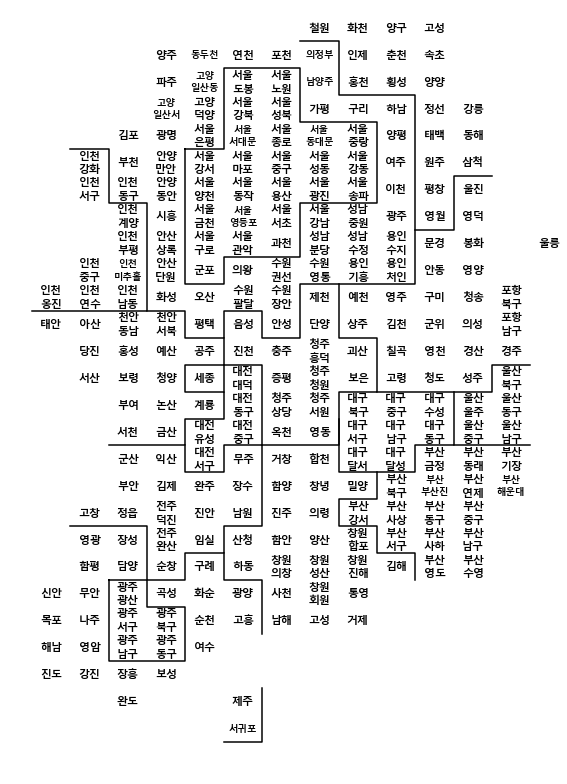

In [25]:
plt.figure(figsize = (8, 11))

# 지역 이름 표시
for idx, row in draw_korea.iterrows():
    
    # 광역시는 구 이름이 겹치는 경우가 많아서 시 단위 이름도 같이 표시!
    # (중구, 서구)
    if len(row['ID'].split()) == 2:
        dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
    elif row['ID'][:2] == '고성':
        dispname = '고성'
    else:
        dispname = row['ID']
        
    # '서대문구', '서귀포시'와 같이 이름이 3자 이상인 경우에는 작은 글자로 표시
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2
    
    # annotate(): 그래프에 화살표를 그린후, 그 화살표에 문자열을 출력하는 기능을 수행
    plt.annotate(dispname, (row['x'] + 0.5, row['y'] + 0.5), weight = 'bold',
                 fontsize = fontsize, ha = 'center', va = 'center', 
                 linespacing = linespacing)

    
# '시도' 경계를 그려주기
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c = 'black', lw = 1.5)

# ivert_yaxis()는 y축이 엑셀에서 0번이 시작하는 것과 matplotlib이 0이라고 인식하는 좌표가 서로 반대이기 때문에 사용!
plt.gca().invert_yaxis()
# plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()

In [26]:
set(draw_korea['ID'].unique()) - set(pop['ID'].unique())

set()

In [27]:
set(pop['ID'].unique()) - set(draw_korea['ID'].unique())


set()

In [28]:
tmp_list = list(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))

for tmp in tmp_list:
    pop = pop.drop(pop[pop['ID'] == tmp].index)
                       
print(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))

set()


In [29]:
pop = pd.merge(pop, draw_korea, how = 'left', on = ['ID'])

pop.head()

,광역시도,시군구,20~39세계,20~39세여자,65세이상계,인구수계,인구수남자,인구수여자,소멸비율,소멸위기지역,소멸위기고위험지역,ID,y,x
0,강원도,강릉시,47006,21807,43830,211643,105025,106618,0.497536,True,False,강릉,3,11
1,강원도,고성군,5217,2042,7755,26792,13864,12928,0.263314,True,False,고성(강원),0,10
2,강원도,동해시,18727,8258,17572,89814,45572,44242,0.469952,True,False,동해,4,11
3,강원도,삼척시,13583,6117,16077,65623,33275,32348,0.380481,True,False,삼척,5,11
4,강원도,속초시,18080,8171,15170,81497,40312,41185,0.538629,False,False,속초,1,10


In [30]:
mapdata = pop.pivot_table(index = 'y', columns = 'x', values = '인구수계')
masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

In [31]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - 
                                     min(blockedMap[targetData]))*0.25 + \
                                                                min(blockedMap[targetData])
    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

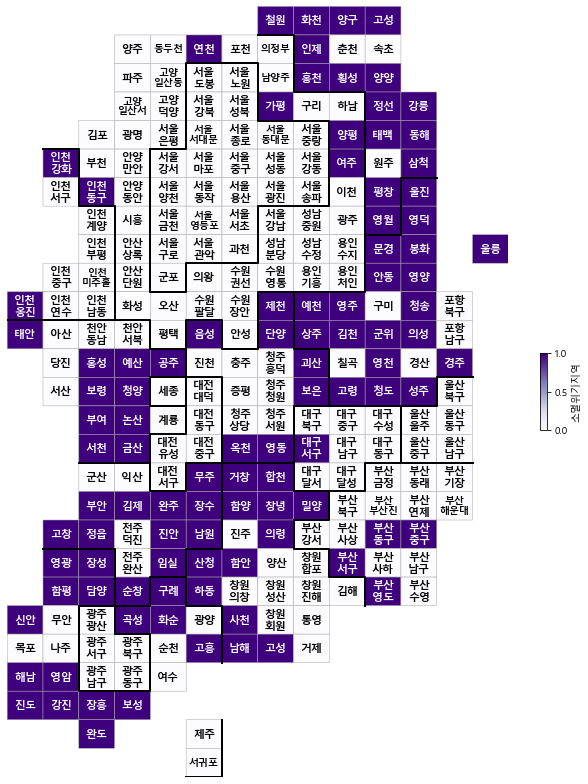

In [32]:
pop['소멸위기지역'] = pop.소멸위기지역.astype(int)
drawKorea('소멸위기지역', pop, 'Purples')

# Folium

In [33]:
pop_folium = pop.set_index('ID')
pop_folium.head()

,광역시도,시군구,20~39세계,20~39세여자,65세이상계,인구수계,인구수남자,인구수여자,소멸비율,소멸위기지역,소멸위기고위험지역,y,x
ID,,,,,,,,,,,,,
강릉,강원도,강릉시,47006,21807,43830,211643,105025,106618,0.497536,1,False,3,11
고성(강원),강원도,고성군,5217,2042,7755,26792,13864,12928,0.263314,1,False,0,10
동해,강원도,동해시,18727,8258,17572,89814,45572,44242,0.469952,1,False,4,11
삼척,강원도,삼척시,13583,6117,16077,65623,33275,32348,0.380481,1,False,5,11
속초,강원도,속초시,18080,8171,15170,81497,40312,41185,0.538629,0,False,1,10


In [34]:
import folium
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [35]:
geo_path = './data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding = 'utf-8'))

map = folium.Map(location = [36.2002, 127.054], zoom_start = 7)
map.choropleth(geo_data = geo_str,
               data = pop_folium['소멸위기지역'],
               columns = [pop_folium.index, pop_folium['소멸위기지역']],
               fill_color = 'Purples',
               key_on = 'feature.id')

map